In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 设置绘图大小
plt.style.use({'figure.figsize':(25,20)})
               
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [66]:
housing_data = pd.read_csv('boston_house_price_english.csv')
X = housing_data.drop(['medv'],axis = 1)
y = housing_data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 随机数种子：random_state

In [67]:
# 从python机器学习与数据挖掘工具库sklearn中导入随机森林回归器
from sklearn.ensemble import RandomForestRegressor

# 导入网格搜索交叉验证，网格搜索可以让模型参数按我们给定的列表遍历，找到效果最好的模型
# 交叉验证可以充分评估回归模型的准确性
from sklearn.model_selection import GridSearchCV

# 构造参数字典，我们让这三个参数按列表中的顺序排列组合遍历一遍
param_grid = {
    'n_estimators':[5,10,20,50,100,200],# 决策树的个数'
    'max_depth':[3,5,7],# 最大树深，树太深会造成过拟合
    'max_features':[0.6,0.7,0.8,1] # 决策划分时考虑的最大特征数
}

# 实例化随机森林回归器
rf = RandomForestRegressor()

# 以随机森林回归器为基础构造网格搜索回归器
grid = GridSearchCV(rf, param_grid=param_grid, cv=3)  # 网格搜索交叉验证, 3折交叉验证

#在训练集上训练
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.6, 0.7, 0.8, 1],
                         'n_estimators': [5, 10, 20, 50, 100, 200]})

# 选取最优参数对应的模型

In [68]:
# 查看效果最好的模型
grid.best_params_

{'max_depth': 5, 'max_features': 0.8, 'n_estimators': 20}

In [69]:
# 制定模型为效果最好参数对应的模型
rf_reg = grid.best_estimator_

In [70]:
rf_reg

RandomForestRegressor(max_depth=5, max_features=0.8, n_estimators=20)

# 可视化其中一颗决策树

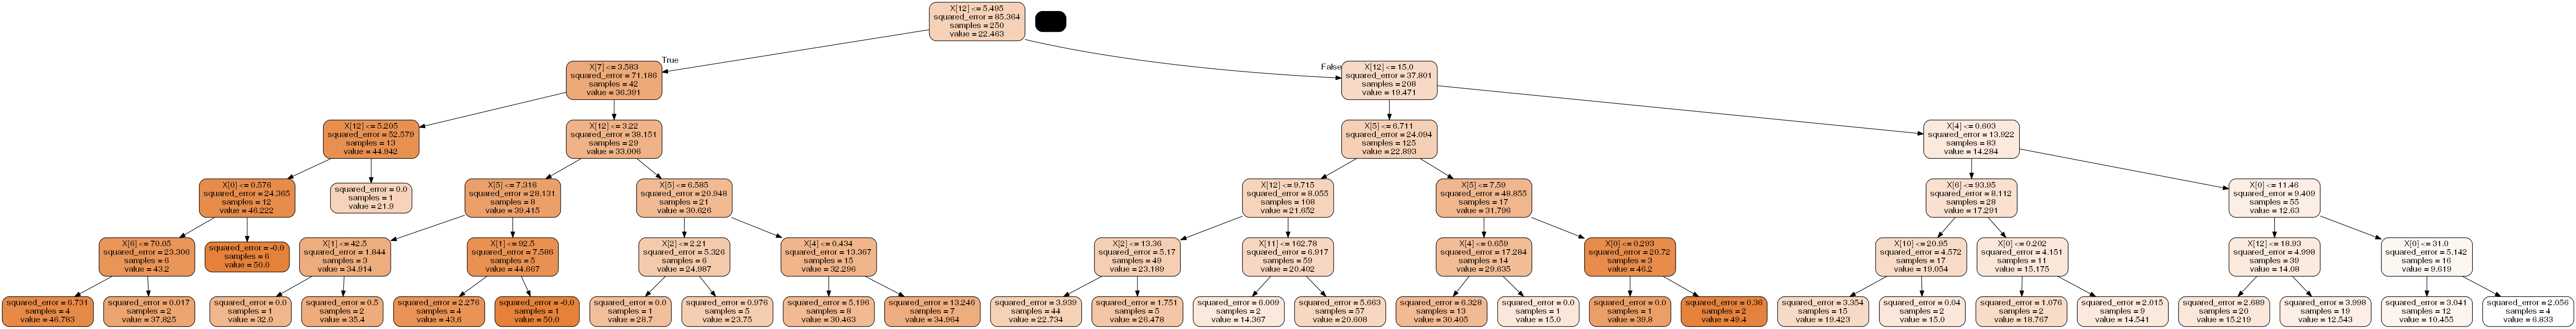

In [71]:
# 可视化决策树
from sklearn import tree
import pydotplus
from IPython.display import Image, display

# 从随机森林模型中选取一颗决策树进行可视化
estimator = rf_reg.estimators_[3]
dot_data = tree.export_graphviz(estimator,
                              out_file = None,
                              filled=True,
                              rounded=True
                             )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

# 特征重要度分析

In [72]:
rf_reg.feature_importances_

array([0.04459436, 0.00276032, 0.00531688, 0.00113199, 0.0144837 ,
       0.35410415, 0.01211812, 0.03321442, 0.00805914, 0.01629799,
       0.01245523, 0.00795511, 0.48750857])

In [73]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [74]:
print('特征排序：')
feature_names=X.columns
feature_importances = rf_reg.feature_importances_
indices = np.argsort(feature_importances)[::-1]

for index in indices:
    print('feature %s (%f)'%(feature_names[index], feature_importances[index]))

特征排序：
feature lstat (0.487509)
feature rm (0.354104)
feature crim (0.044594)
feature dis (0.033214)
feature tax (0.016298)
feature nox (0.014484)
feature ptratio (0.012455)
feature age (0.012118)
feature rad (0.008059)
feature b (0.007955)
feature indus (0.005317)
feature zn (0.002760)
feature chas (0.001132)


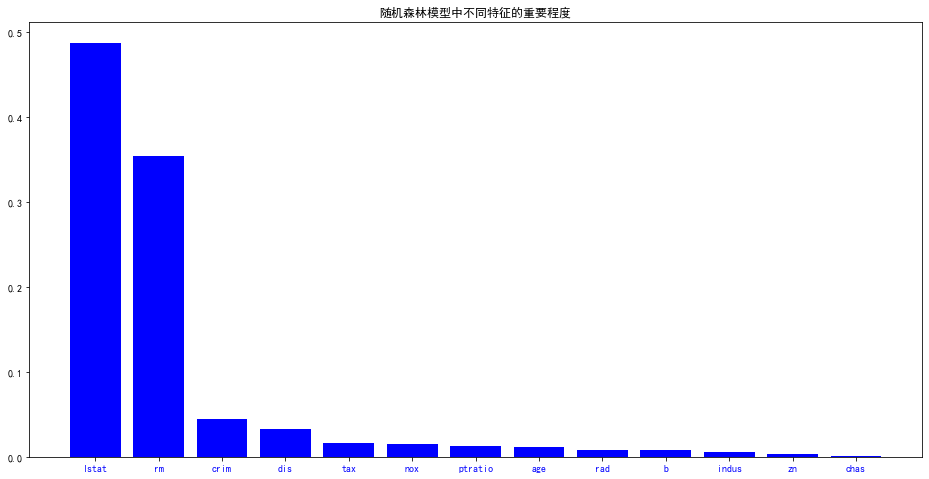

In [75]:
plt.figure(figsize=(16,8))
plt.title('随机森林模型中不同特征的重要程度')
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')
plt.show()

### 换成中文

In [76]:
import pandas as pd
df = pd.read_csv('boston_house_price_Chinese.csv', encoding='gbk')
feature_names = df.columns

In [77]:
feature_names

Index(['犯罪率', '住宅用地所占比例', '城镇中非商业用地所占比例', '是否处于查尔斯河边', '一氧化碳浓度', '住宅房间数',
       '1940年以前建成的业主自住单位的占比', '距离波士顿5个商业中心的加权平均距离', '距离高速公路的便利指数', '不动产权税',
       '学生/教师比例', '黑人比例', '低收入阶层占比', '房价中位数'],
      dtype='object')

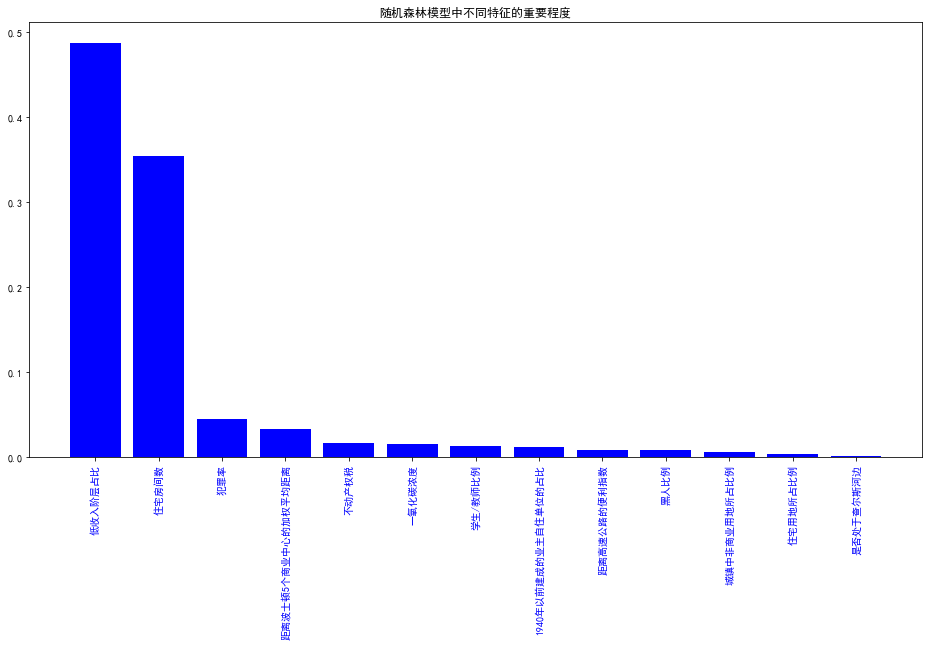

In [78]:
plt.figure(figsize=(16,8))
plt.title('随机森林模型中不同特征的重要程度')
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')
plt.xticks(rotation=90)  # 旋转x轴的标识说明
plt.show()

# 可视化测试集上回归预测的结果

In [79]:
result = {"labels":y_test,"prediction":rf_reg.predict(X_test)}
result = pd.DataFrame(result)

In [80]:
result.head()

,labels,prediction
329,22.6,23.268584
371,50.0,23.963200
219,23.0,21.238690
403,8.3,10.832278
78,21.2,20.743964


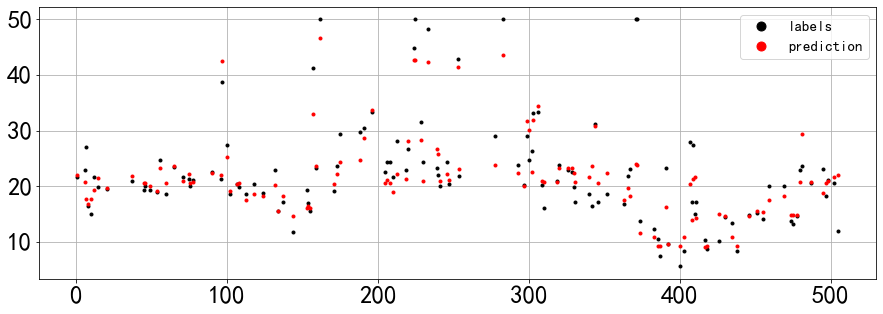

In [81]:
result['labels'].plot(style='k.',figsize=(15,5))
result['prediction'].plot(style='r.')

# 设置图例字号以及图例大小
plt.legend(fontsize=15, markerscale=3)

# 设置坐标数字大小
plt.tick_params(labelsize=25)
plt.grid()

# 计算MSE均方误差和RMSE均方根误差

In [82]:
from sklearn import metrics # metrics 评估指标模块

In [83]:
MSE = metrics.mean_squared_error(y, rf_reg.predict(X))

In [84]:
MSE

8.64422368254063

In [85]:
np.sqrt(MSE)
# print('(MSE,RMSE)=',(MSE,RMSE))

2.9401060665460066

# 提交结果

In [86]:
submission = {"prediction":rf_reg.predict(X_test)}
submission = pd.DataFrame(submission)

In [87]:
submission.head()

,prediction
0,23.268584
1,23.963200
2,21.238690
3,10.832278
4,20.743964


In [88]:
submission.to_csv('随机森林预测波士顿房价数据提交_预测.csv')
y_test.to_csv('随机森林预测波士顿房价数据提交_标签.csv')